In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.metrics import roc_auc_score, average_precision_score, hamming_loss, precision_score, recall_score, f1_score
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import spearmanr

def round_to_005(x):
    return round(x/0.05)*0.05

### Precision-recall plots

In [52]:
gda = pd.read_pickle('./OT/Final/gene_direction_all.pkl')
gda = gda.loc[(gda['neg'] == 1) & (gda['pos'] == 1)]['gene']

# Load and preprocess drug data
drugs = pd.read_pickle('./Drugs/combined.pkl').fillna(0)
for col in ['neg', 'other', 'pos']:
    drugs.loc[drugs[col] > 0, col] = 1
drugs['ID'] = drugs['Code'] + '|' + drugs['gene']
drugs = drugs.drop(['Code', 'gene'], axis=1)

# Load predictions
data = pd.read_csv(f'./Training/Predictions/all_holdout_predictions.csv').merge(drugs)
data['gene'] = data['ID'].str.split('|').str[1]

doe = pd.read_csv(f'./Training/Predictions/doe_all_holdout_predictions.csv')
doe = doe.set_axis(['gene', 'doe_neg', 'doe_other', 'doe_pos'], axis=1)
data = data.merge(doe)

# Compute averaged predictions
data['avg_neg'] = data[['pred_neg', 'doe_neg']].mean(axis=1)
data['avg_pos'] = data[['pred_pos', 'doe_pos']].mean(axis=1)
data['avg_other'] = data[['pred_other', 'doe_other']].mean(axis=1)
pred = data.copy()


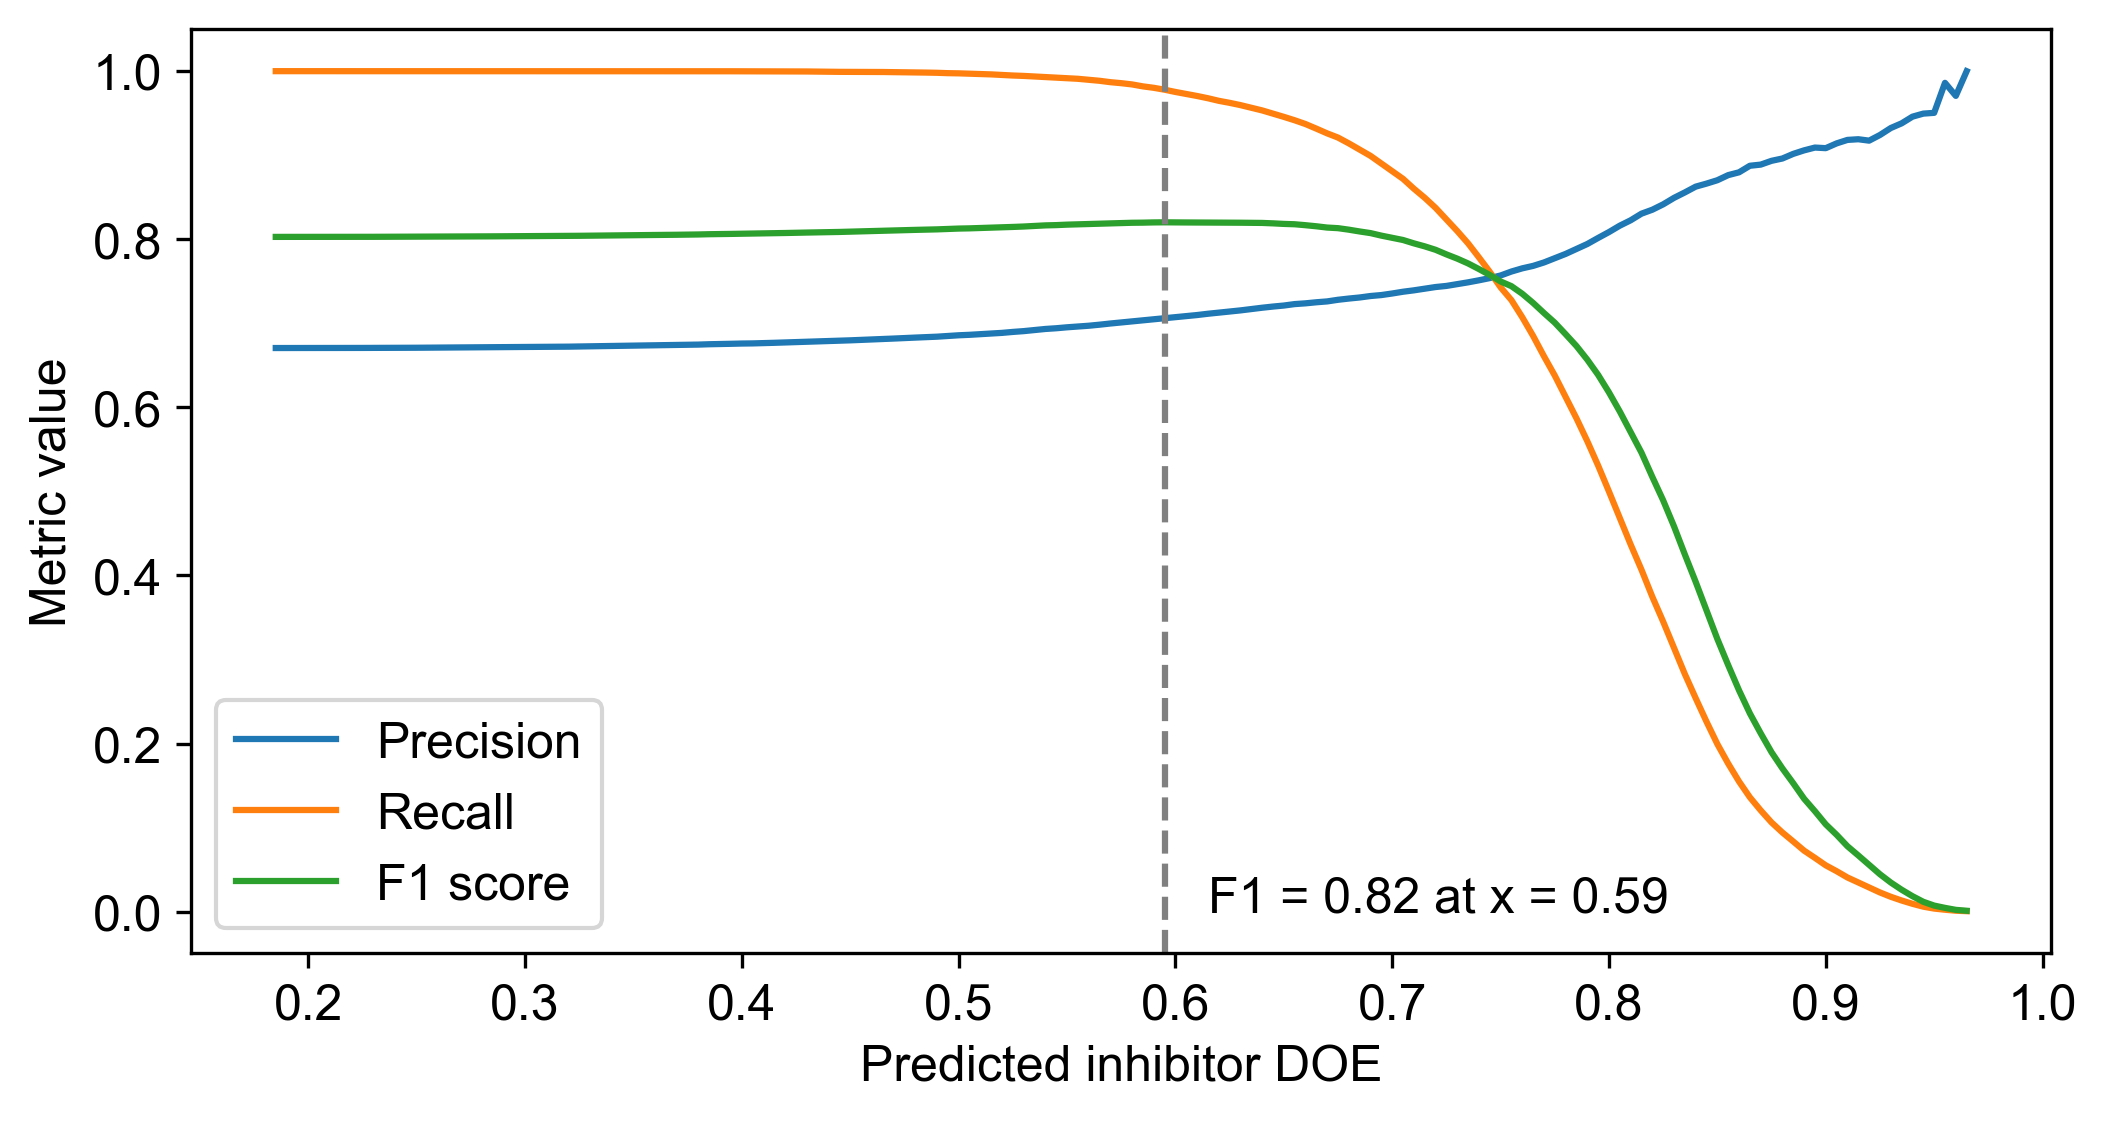

Precision at BT: 0.7062
Recall at BT: 0.9780


In [53]:
plt.figure(figsize=(8,4), dpi=300)
thresholds=np.arange(0,1.0001,0.005)
rows=[]
for t in thresholds:
    b=(pred['avg_neg']>=t).astype(int)
    if b.sum()>=5 and (len(b)-b.sum())>=5:
        p=precision_score(pred['neg'],b,zero_division=0)
        r=recall_score(pred['neg'],b,zero_division=0)
        f=f1_score(pred['neg'],b,zero_division=0)
        rows.extend([[t,'Precision',p],[t,'Recall',r],[t,'F1 score',f]])
df=pd.DataFrame(rows,columns=['threshold','metric','value'])
best_f1=df[df['metric']=='F1 score']
bt=best_f1.loc[best_f1['value'].idxmax(),'threshold'] if not best_f1.empty else None
sns.lineplot(x='threshold',y='value',hue='metric',data=df)
if bt is not None:
    plt.axvline(x=bt,linestyle='--',color='gray')
    max_f1=best_f1['value'].max()
    plt.annotate(f'F1 = {max_f1:.2f} at x = {bt:.2f}',xy=(bt+0.02,0))
plt.legend(title='')
plt.xlabel('Predicted inhibitor DOE')
plt.ylabel('Metric value')
plt.show()

b = (pred['avg_neg'] >= bt).astype(int)
precision = precision_score(pred['neg'], b, zero_division=0)
recall = recall_score(pred['neg'], b, zero_division=0)
print(f'Precision at BT: {precision:.4f}')
print(f'Recall at BT: {recall:.4f}')


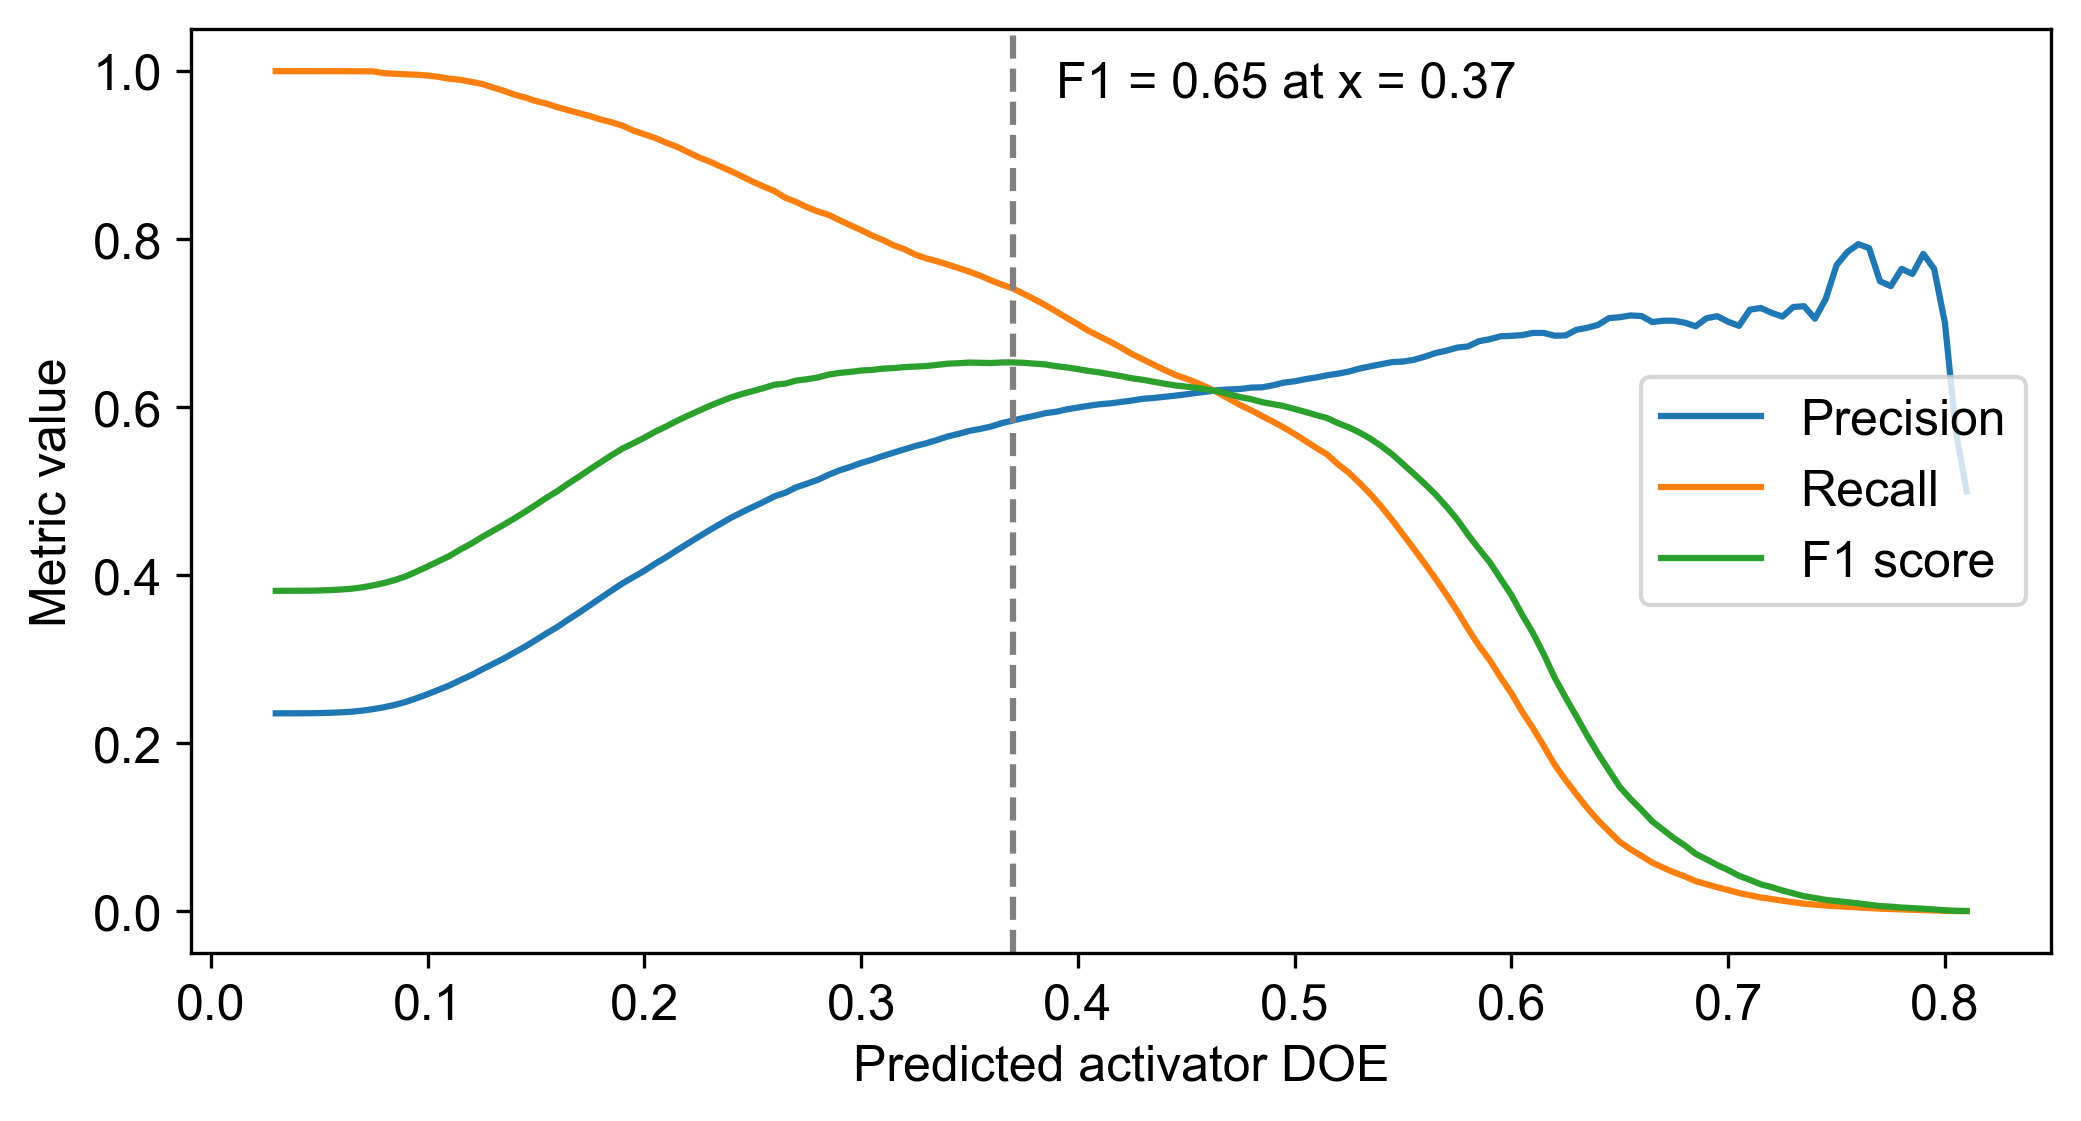

Precision at BT: 0.5841
Recall at BT: 0.7413


In [54]:
plt.figure(figsize=(8,4), dpi=300)
thresholds=np.arange(0,1.0001,0.005)
rows=[]
for t in thresholds:
    b=(pred['avg_pos']>=t).astype(int)
    if b.sum()>=5 and (len(b)-b.sum())>=5:
        p=precision_score(pred['pos'],b,zero_division=0)
        r=recall_score(pred['pos'],b,zero_division=0)
        f=f1_score(pred['pos'],b,zero_division=0)
        rows.extend([[t,'Precision',p],[t,'Recall',r],[t,'F1 score',f]])
df=pd.DataFrame(rows,columns=['threshold','metric','value'])
best_f1=df[df['metric']=='F1 score']
bt=best_f1.loc[best_f1['value'].idxmax(),'threshold'] if not best_f1.empty else None
sns.lineplot(x='threshold',y='value',hue='metric',data=df)
if bt is not None:
    plt.axvline(x=bt,linestyle='--',color='gray')
    max_f1=best_f1['value'].max()
    plt.annotate(f'F1 = {max_f1:.2f} at x = {bt:.2f}',xy=(bt+0.02,0.97))
plt.legend(title='', loc='center right')
plt.xlabel('Predicted activator DOE')
plt.ylabel('Metric value')
plt.show()

b = (pred['avg_pos'] >= bt).astype(int)
precision = precision_score(pred['pos'], b, zero_division=0)
recall = recall_score(pred['pos'], b, zero_division=0)
print(f'Precision at BT: {precision:.4f}')
print(f'Recall at BT: {recall:.4f}')


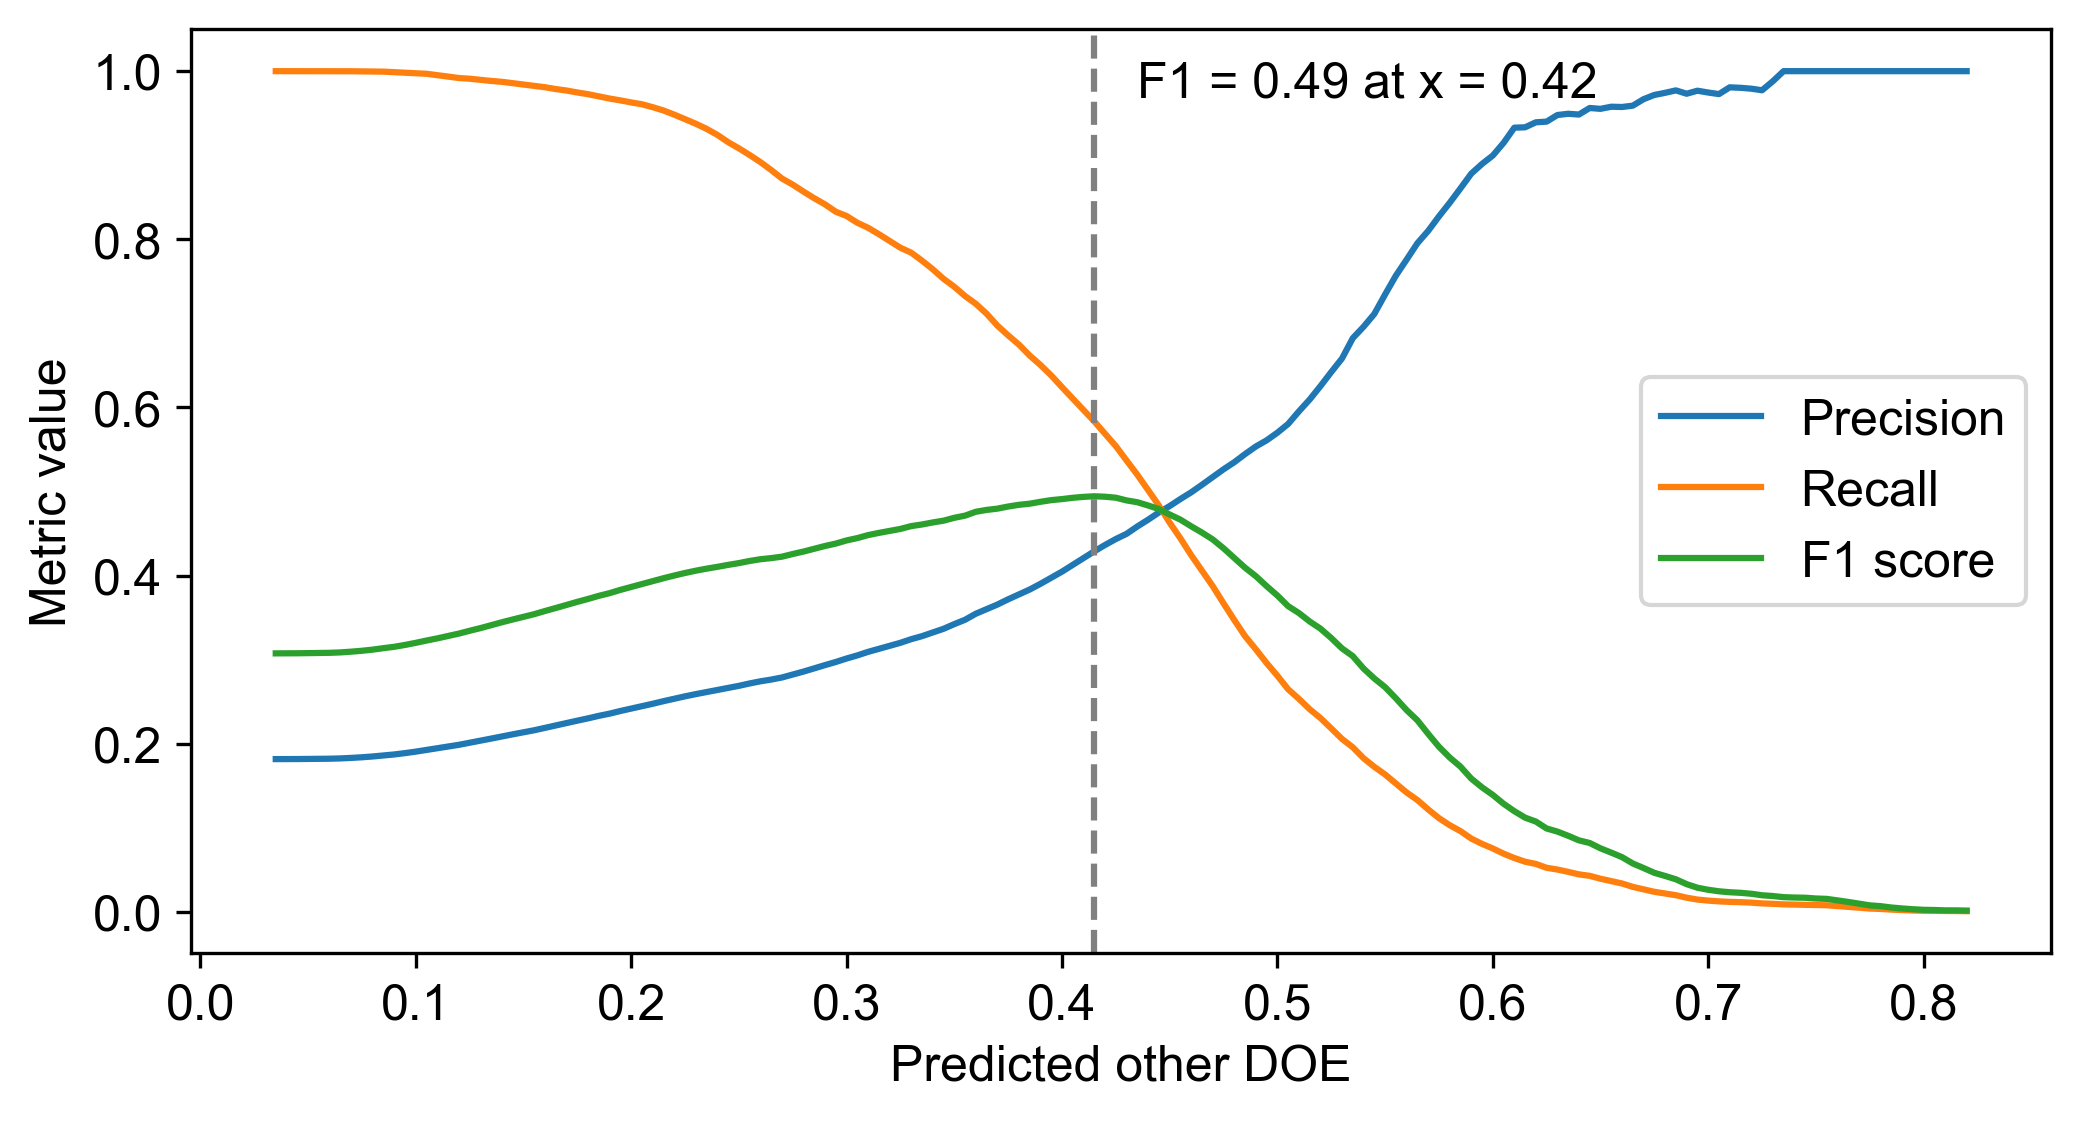

Precision at BT: 0.4288
Recall at BT: 0.5833


In [55]:
plt.figure(figsize=(8,4), dpi=300)
thresholds=np.arange(0,1.0001,0.005)
rows=[]
for t in thresholds:
    b=(pred['avg_other']>=t).astype(int)
    if b.sum()>=5 and (len(b)-b.sum())>=5:
        p=precision_score(pred['other'],b,zero_division=0)
        r=recall_score(pred['other'],b,zero_division=0)
        f=f1_score(pred['other'],b,zero_division=0)
        rows.extend([[t,'Precision',p],[t,'Recall',r],[t,'F1 score',f]])
df=pd.DataFrame(rows,columns=['threshold','metric','value'])
best_f1=df[df['metric']=='F1 score']
bt=best_f1.loc[best_f1['value'].idxmax(),'threshold'] if not best_f1.empty else None
sns.lineplot(x='threshold',y='value',hue='metric',data=df)
if bt is not None:
    plt.axvline(x=bt,linestyle='--',color='gray')
    max_f1=best_f1['value'].max()
    plt.annotate(f'F1 = {max_f1:.2f} at x = {bt:.2f}',xy=(bt+0.02,0.97))
plt.legend(title='')
plt.xlabel('Predicted other DOE')
plt.ylabel('Metric value')
plt.show()

b = (pred['avg_other'] >= bt).astype(int)
precision = precision_score(pred['other'], b, zero_division=0)
recall = recall_score(pred['other'], b, zero_division=0)
print(f'Precision at BT: {precision:.4f}')
print(f'Recall at BT: {recall:.4f}')


## Metrics

In [ ]:
gda = pd.read_pickle('./OT/Final/gene_direction_all.pkl')
gda = gda.loc[(gda['neg'] == 1) & (gda['pos'] == 1)]['gene']

# Load and preprocess drug data
drugs = pd.read_pickle('./Drugs/combined.pkl').fillna(0)
for col in ['neg', 'other', 'pos']:
    drugs.loc[drugs[col] > 0, col] = 1
drugs['ID'] = drugs['Code'] + '|' + drugs['gene']
drugs = drugs.drop(['Code', 'gene'], axis=1)

# Load predictions
data = pd.read_csv(f'./Training/Predictions/all_holdout_predictions.csv').merge(drugs)
data['gene'] = data['ID'].str.split('|').str[1]

doe = pd.read_csv(f'./Training/Predictions/doe_all_holdout_predictions.csv')
doe = doe.set_axis(['gene', 'doe_neg', 'doe_other', 'doe_pos'], axis=1)
data = data.merge(doe)

# Compute averaged predictions
data['avg_neg'] = data[['pred_neg', 'doe_neg']].mean(axis=1)
data['avg_pos'] = data[['pred_pos', 'doe_pos']].mean(axis=1)
data['avg_other'] = data[['pred_other', 'doe_other']].mean(axis=1)

# Define bootstrapping function
def bootstrap_all_metrics(y_true, y_score, n_boot):
    np.random.seed(42)
    out = {f'auroc_{c}': [] for c in ['neg', 'other', 'pos']}
    out.update({f'auprc_{c}': [] for c in ['neg', 'other', 'pos']})
    for x in ['auroc_micro', 'auroc_macro', 'auprc_micro', 'auprc_macro', 'hamming']:
        out[x] = []
    for _ in range(n_boot):
        idx = np.random.randint(0, len(y_true), len(y_true))
        yt, ys = y_true[idx], y_score[idx]
        for i, c in enumerate(['neg', 'other', 'pos']):
            out[f'auroc_{c}'].append(roc_auc_score(yt[:, i], ys[:, i]))
            out[f'auprc_{c}'].append(average_precision_score(yt[:, i], ys[:, i]))
        out['auroc_micro'].append(roc_auc_score(yt, ys, average='micro'))
        out['auroc_macro'].append(roc_auc_score(yt, ys, average='macro'))
        out['auprc_micro'].append(average_precision_score(yt, ys, average='micro'))
        out['auprc_macro'].append(average_precision_score(yt, ys, average='macro'))
        out['hamming'].append(hamming_loss(yt, (ys >= 0.5).astype(int)))
    return {k: (np.mean(v), np.percentile(v, 2.5), np.percentile(v, 97.5)) for k, v in out.items()}

# Initialize metrics storage
metrics = pd.DataFrame()

for subset in ['bd','all']:
    if subset == 'all':
        td = data.copy()
    else:
        td = data.loc[data['gene'].isin(gda)]
    for model in ['doe', 'pred', 'avg']:
        y_true = td[['neg', 'other', 'pos']].values
        y_score = td[[f'{model}_neg', f'{model}_other', f'{model}_pos']].values
    
        boot = bootstrap_all_metrics(y_true, y_score, 100)
        new_records = []
        for k, (m, l, h) in boot.items():
            new_records.append({'subset': subset, 'model': model, 'metric': k, 'mean': m, 'ci_low': l, 'ci_high': h})
        metrics = pd.concat([metrics, pd.DataFrame(new_records)], ignore_index=True)

# Save and display the results
metrics.to_pickle('./Training/Metrics/comp_metrics.pkl')


Text(0, 0.5, 'AUROC')

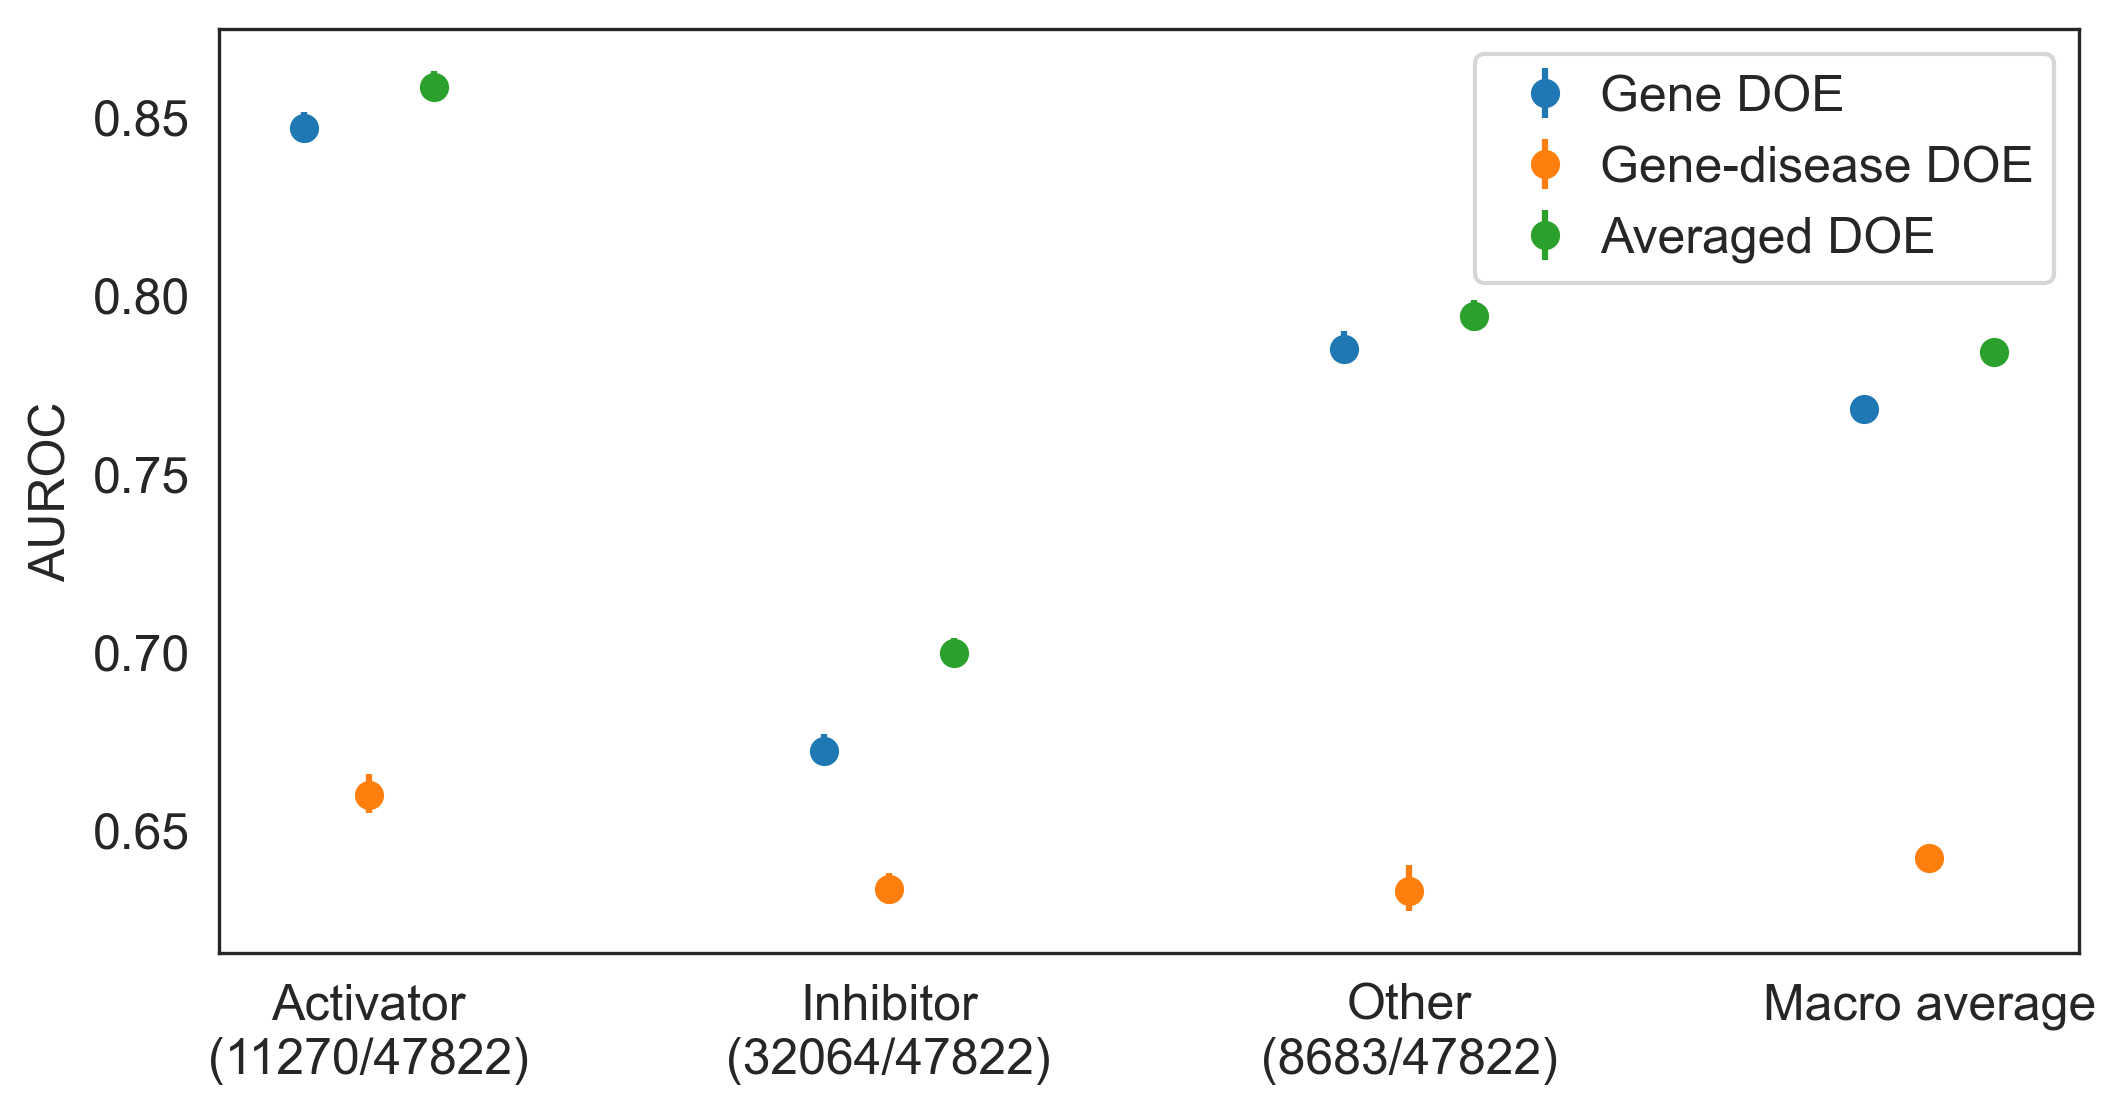

In [2]:
metrics = pd.read_pickle('./Training/Metrics/comp_metrics.pkl')
metrics = metrics.loc[metrics['subset'] == 'all']
metrics['model'] = metrics['model'].map({'doe':'Gene DOE',
                                         'pred':'Gene-disease DOE',
                                         'avg':'Averaged DOE'})
metrics['model'] = pd.Categorical(metrics['model'], ['Gene DOE','Gene-disease DOE','Averaged DOE'])

#####

drugs = pd.read_pickle('./Drugs/combined.pkl').fillna(0)
for col in ['neg','other','pos']:
    if True:
        drugs.loc[drugs[col] > 0, col] = 1
    if False:
        drugs.loc[drugs[col] == 0.5, col] = 1*0.732*0.548*0.580*0.911
        drugs.loc[drugs[col] == 1, col] = 1*0.732*0.548*0.580
        drugs.loc[drugs[col] == 2., col] = 1*0.732*0.548
        drugs.loc[drugs[col] == 3, col] = 1*0.732
        drugs.loc[drugs[col] == 4, col] = 1
drugs['ID'] = drugs['Code'] + '|' + drugs['gene']
drugs = drugs.drop(['Code','gene'],axis=1)

input = pd.read_pickle('./Training/input_extended.pkl')
input['ID'] = input['Code'] + '|' + input['gene']
input = input.drop(['Code','gene'],axis=1)
input = input.dropna(thresh=20, axis=1)
input = input.dropna(thresh=2,axis=0)

data = drugs.merge(input, on='ID')
n_ids = data['ID'].nunique()
n_neg = int(data['neg'].sum())
n_other = int(data['other'].sum())
n_pos = int(data['pos'].sum())

#####

res = metrics.copy()
res = res.loc[~res['metric'].str.contains('micro')]
res = res.loc[res['metric'].str.contains('auroc')]
res['metric'] = res['metric'].map({'auroc_neg':f'Inhibitor\n({n_neg}/{n_ids})',
                                   'auroc_other':f'Other\n({n_other}/{n_ids})',
                                   'auroc_pos':f'Activator\n({n_pos}/{n_ids})',
                                   'auroc_macro':'Macro average'})
res['metric'] = pd.Categorical(res['metric'], [f'Activator\n({n_pos}/{n_ids})',
                                               f'Inhibitor\n({n_neg}/{n_ids})',
                                               f'Other\n({n_other}/{n_ids})',
                                               'Macro average'])
res = res.sort_values(['model','metric'])

sns.set_style('white')

fig, ax = plt.subplots(figsize=(8,4), dpi=300)
mechanisms = res['model'].unique()
offset = 0.125  # Offset for dodging
x_positions = range(len(res['metric'].unique()))  # Base x positions for each column

for i, mech in enumerate(mechanisms):
    subset = res[res['model'] == mech]
    mech_positions = [x + (i - len(mechanisms) / 2 + 0.5) * offset for x in x_positions]
    ax.errorbar(mech_positions, subset['mean'], 
                yerr=[subset['mean'] - subset['ci_low'], subset['ci_high'] - subset['mean']], 
                fmt='o', label=mech)

ax.set_xticks(range(len(res['metric'].unique())))
ax.set_xticklabels(res['metric'].unique())
ax.legend(title='', ncols=1, loc='upper right', columnspacing=0.1, handletextpad=0.1)

#plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)
plt.xlabel('')
plt.ylabel('AUROC')


Text(0, 0.5, 'AUROC')

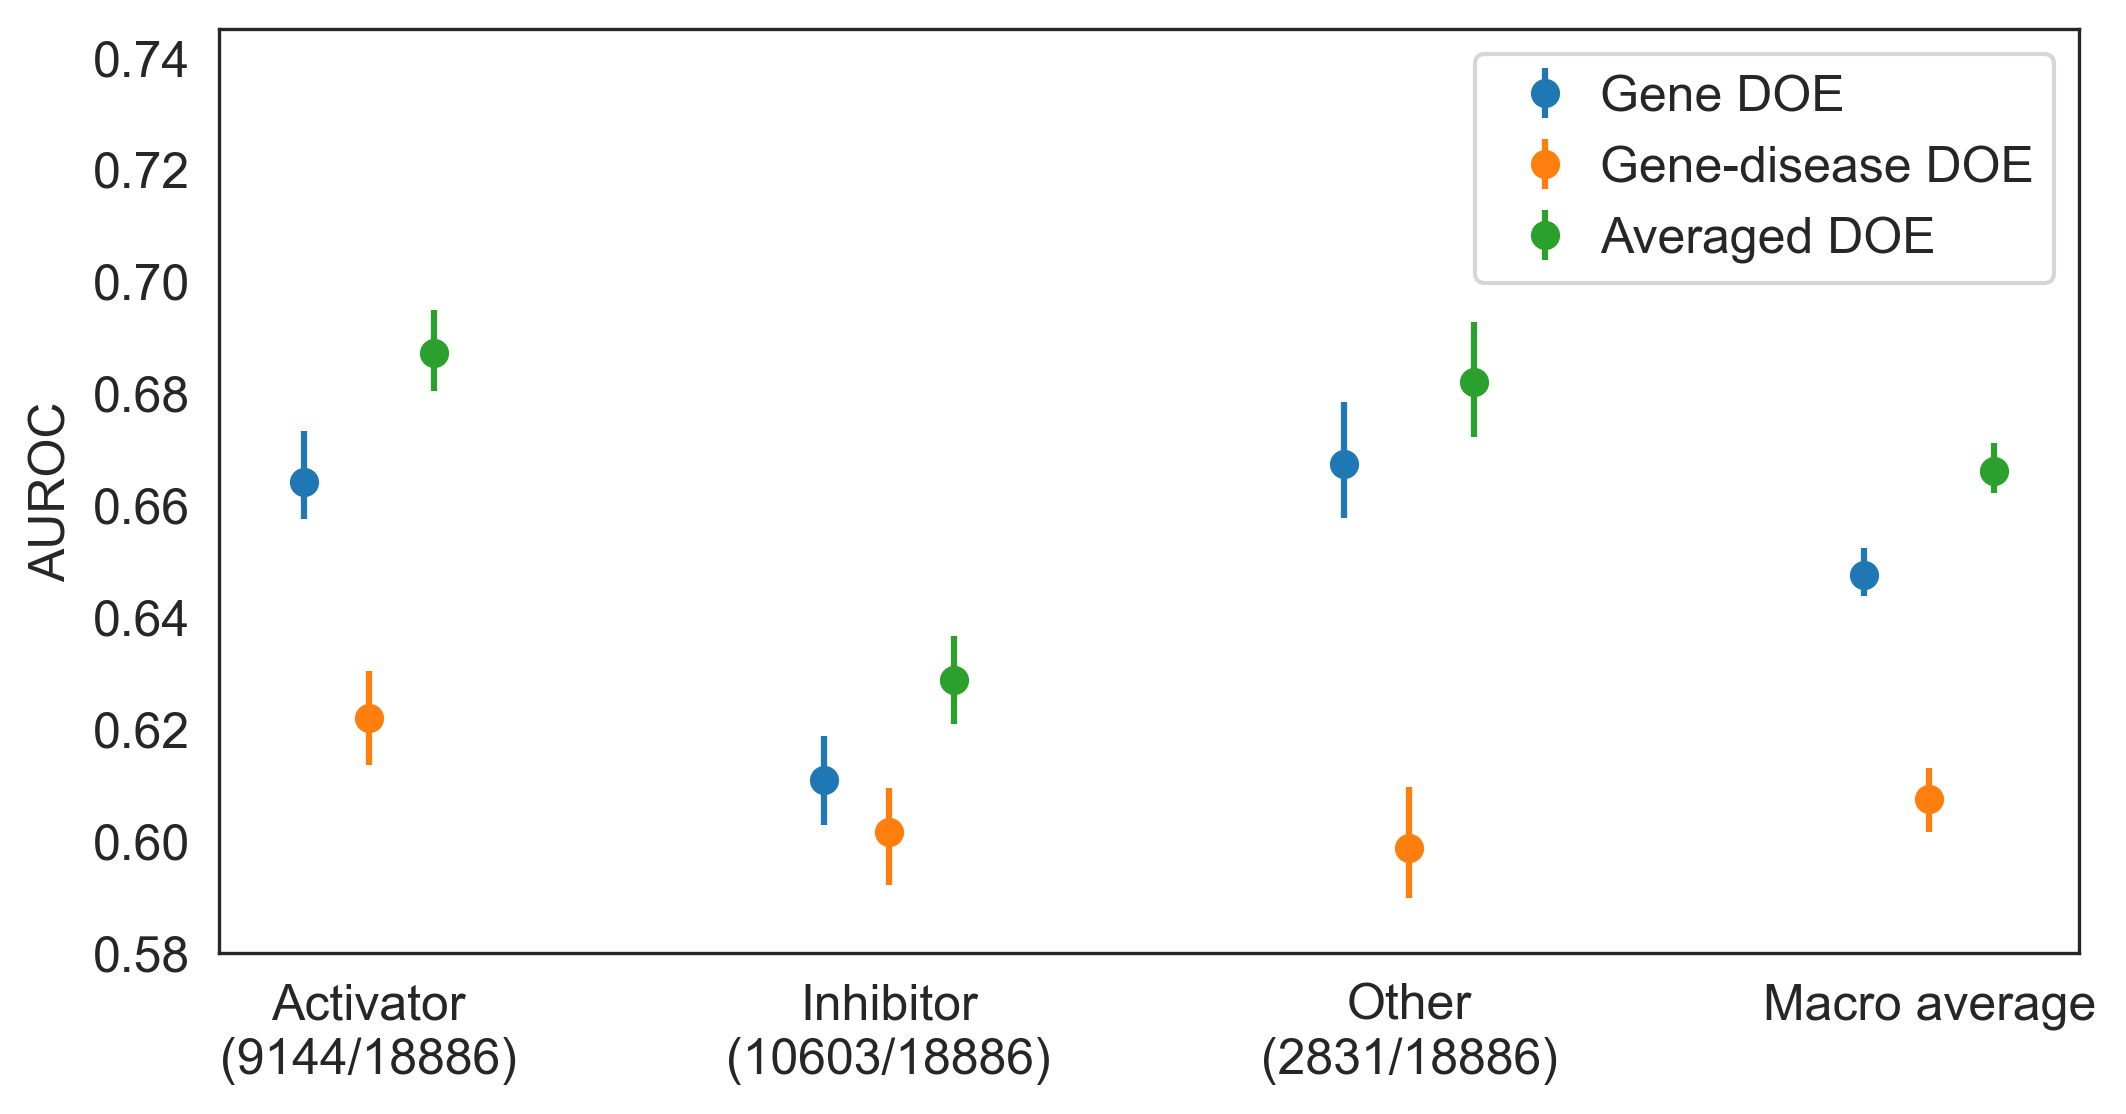

In [3]:
metrics = pd.read_pickle('./Training/Metrics/comp_metrics.pkl')
metrics = metrics.loc[metrics['subset'] == 'bd']
metrics['model'] = metrics['model'].map({'doe':'Gene DOE',
                                         'pred':'Gene-disease DOE',
                                         'avg':'Averaged DOE'})
metrics['model'] = pd.Categorical(metrics['model'], ['Gene DOE','Gene-disease DOE','Averaged DOE'])

#####

gda = pd.read_pickle('./OT/Final/gene_direction_all.pkl')
gda = gda.loc[(gda['neg'] == 1) & (gda['pos'] == 1)]['gene']

drugs = pd.read_pickle('./Drugs/combined.pkl').fillna(0)
for col in ['neg','other','pos']:
    if True:
        drugs.loc[drugs[col] > 0, col] = 1
    if False:
        drugs.loc[drugs[col] == 0.5, col] = 1*0.732*0.548*0.580*0.911
        drugs.loc[drugs[col] == 1, col] = 1*0.732*0.548*0.580
        drugs.loc[drugs[col] == 2., col] = 1*0.732*0.548
        drugs.loc[drugs[col] == 3, col] = 1*0.732
        drugs.loc[drugs[col] == 4, col] = 1
drugs['ID'] = drugs['Code'] + '|' + drugs['gene']
drugs = drugs.loc[drugs['gene'].isin(gda)]
drugs = drugs.drop(['Code','gene'],axis=1)

input = pd.read_pickle('./Training/input_extended.pkl')
input['ID'] = input['Code'] + '|' + input['gene']
input = input.drop(['Code','gene'],axis=1)
input = input.dropna(thresh=20, axis=1)
input = input.dropna(thresh=2,axis=0)

data = drugs.merge(input, on='ID')
n_ids = data['ID'].nunique()
n_neg = int(data['neg'].sum())
n_other = int(data['other'].sum())
n_pos = int(data['pos'].sum())

#####

res = metrics.copy()
res = res.loc[~res['metric'].str.contains('micro')]
res = res.loc[res['metric'].str.contains('auroc')]
res['metric'] = res['metric'].map({'auroc_neg':f'Inhibitor\n({n_neg}/{n_ids})',
                                   'auroc_other':f'Other\n({n_other}/{n_ids})',
                                   'auroc_pos':f'Activator\n({n_pos}/{n_ids})',
                                   'auroc_macro':'Macro average'})
res['metric'] = pd.Categorical(res['metric'], [f'Activator\n({n_pos}/{n_ids})',
                                               f'Inhibitor\n({n_neg}/{n_ids})',
                                               f'Other\n({n_other}/{n_ids})',
                                               'Macro average'])
res = res.sort_values(['model','metric'])

sns.set_style('white')

fig, ax = plt.subplots(figsize=(8,4), dpi=300)
mechanisms = res['model'].unique()
offset = 0.125  # Offset for dodging
x_positions = range(len(res['metric'].unique()))  # Base x positions for each column

for i, mech in enumerate(mechanisms):
    subset = res[res['model'] == mech]
    mech_positions = [x + (i - len(mechanisms) / 2 + 0.5) * offset for x in x_positions]
    ax.errorbar(mech_positions, subset['mean'], 
                yerr=[subset['mean'] - subset['ci_low'], subset['ci_high'] - subset['mean']], 
                fmt='o', label=mech)

ax.set_xticks(range(len(res['metric'].unique())))
ax.set_xticklabels(res['metric'].unique())
ax.legend(title='', ncols=1, loc='upper right', columnspacing=0.1, handletextpad=0.1)

#plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)
plt.ylim([0.58,0.745])
plt.xlabel('')
plt.ylabel('AUROC')


## Odds ratios for correct DOE

### Above/below percentile cutoffs

In [12]:
drugs = pd.read_pickle('./Drugs/combined.pkl').fillna(0)
for col in ['neg', 'other', 'pos']:
    drugs.loc[drugs[col] > 0, col] = 1
drugs['ID'] = drugs['Code'] + '|' + drugs['gene']
drugs = drugs.drop(['Code', 'gene'], axis=1)

data = pd.read_csv('./Training/Predictions/all_holdout_predictions.csv').merge(drugs)
for col in['pred_neg','pred_other','pred_pos']:
    data[col+'_pct'] = data[col].rank(pct=True)
data['gene'] = data['ID'].str.split('|').str[1]

doe = pd.read_csv('./Training/Predictions/doe_all_holdout_predictions.csv')
doe = doe.set_axis(['gene', 'doe_neg', 'doe_other', 'doe_pos'], axis=1)
for col in['doe_neg','doe_other','doe_pos']:
    doe[col+'_pct'] = doe[col].rank(pct=True)
data = data.merge(doe)

res = []

for predictor in ['pred','doe']:
    for doe in ['pos','neg','other']:
        for cutoff in np.arange(0.75, 0.95 + 0.001, 0.05):
            try:
                raw_score = data[predictor+'_'+doe].quantile(cutoff)
                indata = data.copy()
                indata['cutoff'] = 0
                indata.loc[indata[predictor+'_'+doe+'_pct'] > cutoff, 'cutoff'] = 1
            
                xvar = 'cutoff'
                yvar = doe
                temp = indata.dropna(subset=[xvar, yvar])
                
                X1 = sm.add_constant(temp[[xvar]])
                y1 = temp[yvar]
                model1 = sm.Logit(y1, X1).fit(disp=0)
                or_1 = np.exp(model1.params[xvar])
                ci_1 = np.exp(model1.conf_int().loc[xvar])
                pval = model1.pvalues[xvar]
            
                temp_y = temp.loc[temp['cutoff'] == 1]
                temp_n = temp.loc[temp['cutoff'] == 0]

                if len(temp_n) > 10:
                    res.append({
                        'Predictor':predictor,
                        'DOE':doe,
                        'Percentile cutoff': cutoff,
                        'Raw Score': raw_score,
                        'Above': str(int(temp_y[yvar].sum())) + '/' + str(len(temp_y)),
                        'Below': str(int(temp_n[yvar].sum())) + '/' + str(len(temp_n)),
                        'OR': or_1,
                        'CI_lower': ci_1[0],
                        'CI_upper': ci_1[1],
                        'p': pval
                    })
            except:
                continue

output_df = pd.DataFrame(res)
output_df


,Predictor,DOE,Percentile cutoff,Raw Score,Above,Below,OR,CI_lower,CI_upper,p
0,pred,pos,0.75,0.289815,4402/11956,6868/35866,2.460429,2.350917,2.575042,0.000000e+00
1,pred,pos,0.80,0.304457,3660/9565,7610/38257,2.496114,2.378482,2.619564,6.366430e-302
2,pred,pos,0.85,0.322289,2890/7174,8380/40648,2.597625,2.463666,2.738867,1.598481e-273
3,pred,pos,0.90,0.348362,2100/4783,9170/43039,2.890891,2.718212,3.074539,3.663874e-250
4,pred,pos,0.95,0.409958,1214/2392,10056/45430,3.625203,3.335919,3.939572,2.256611e-202
5,pred,neg,0.75,0.732190,9567/11956,22497/35866,2.379764,2.264438,2.500964,1.826808e-256
6,pred,neg,0.80,0.747708,7798/9565,24266/38257,2.544469,2.406682,2.690145,4.445265e-237
7,pred,neg,0.85,0.767475,5966/7174,26098/40648,2.753418,2.579937,2.938563,2.303374e-204
8,pred,neg,0.90,0.791392,4051/4783,28013/43039,2.968485,2.737047,3.219494,4.031227e-152
9,pred,neg,0.95,0.831386,2107/2392,29957/45430,3.818527,3.369118,4.327883,1.161606e-97


### Multivariable regressions including both scores

In [48]:
drugs = pd.read_pickle('./Drugs/combined.pkl').fillna(0)
for col in ['neg', 'other', 'pos']:
    drugs.loc[drugs[col] > 0, col] = 1
drugs['ID'] = drugs['Code'] + '|' + drugs['gene']
drugs = drugs.drop(['Code', 'gene'], axis=1)

data = pd.read_csv('./Training/Predictions/all_holdout_predictions.csv').merge(drugs)
data['gene'] = data['ID'].str.split('|').str[1]

doe = pd.read_csv('./Training/Predictions/doe_all_holdout_predictions.csv')
doe = doe.set_axis(['gene', 'doe_neg', 'doe_other', 'doe_pos'], axis=1)
data = data.merge(doe)

# Standardize predictors for each outcome
for outcome in ['neg', 'other', 'pos']:
    data[f'pred_{outcome}'] = (data[f'pred_{outcome}'] - data[f'pred_{outcome}'].mean()) / data[f'pred_{outcome}'].std()
    data[f'doe_{outcome}']  = (data[f'doe_{outcome}']  - data[f'doe_{outcome}'].mean())  / data[f'doe_{outcome}'].std()

results = []

for outcome in ['neg', 'other', 'pos']:
    predictors = [f'pred_{outcome}', f'doe_{outcome}']
    X = sm.add_constant(data[predictors])
    y = data[outcome]
    model = sm.Logit(y, X).fit(disp=0)
    
    params = model.params
    conf = model.conf_int()
    conf.columns = ['2.5%', '97.5%']
    pvalues = model.pvalues
    
    or_values = np.exp(params)
    ci_lower = np.exp(conf['2.5%'])
    ci_upper = np.exp(conf['97.5%'])
    
    for var in predictors:
        if var.startswith('pred'):
            var_name = "Gene-disease DOE"
        elif var.startswith('doe'):
            var_name = "Gene DOE"
            
        results.append({
            'Outcome': outcome,
            'Variable': var_name,
            'OR': or_values[var],
            'CI_lower': ci_lower[var],
            'CI_upper': ci_upper[var],
            'p_value': pvalues[var]
        })

rdf = pd.DataFrame(results)
rdf


,Outcome,Variable,OR,CI_lower,CI_upper,p_value
0,neg,Gene-disease DOE,1.536770,1.503943,1.570314,0.000000e+00
1,neg,Gene DOE,1.901461,1.859947,1.943902,0.000000e+00
2,other,Gene-disease DOE,1.440245,1.405493,1.475856,2.193435e-188
3,other,Gene DOE,3.122102,3.028926,3.218144,0.000000e+00
4,pos,Gene-disease DOE,1.486873,1.448719,1.526032,1.561031e-196
5,pos,Gene DOE,3.629827,3.538652,3.723352,0.000000e+00


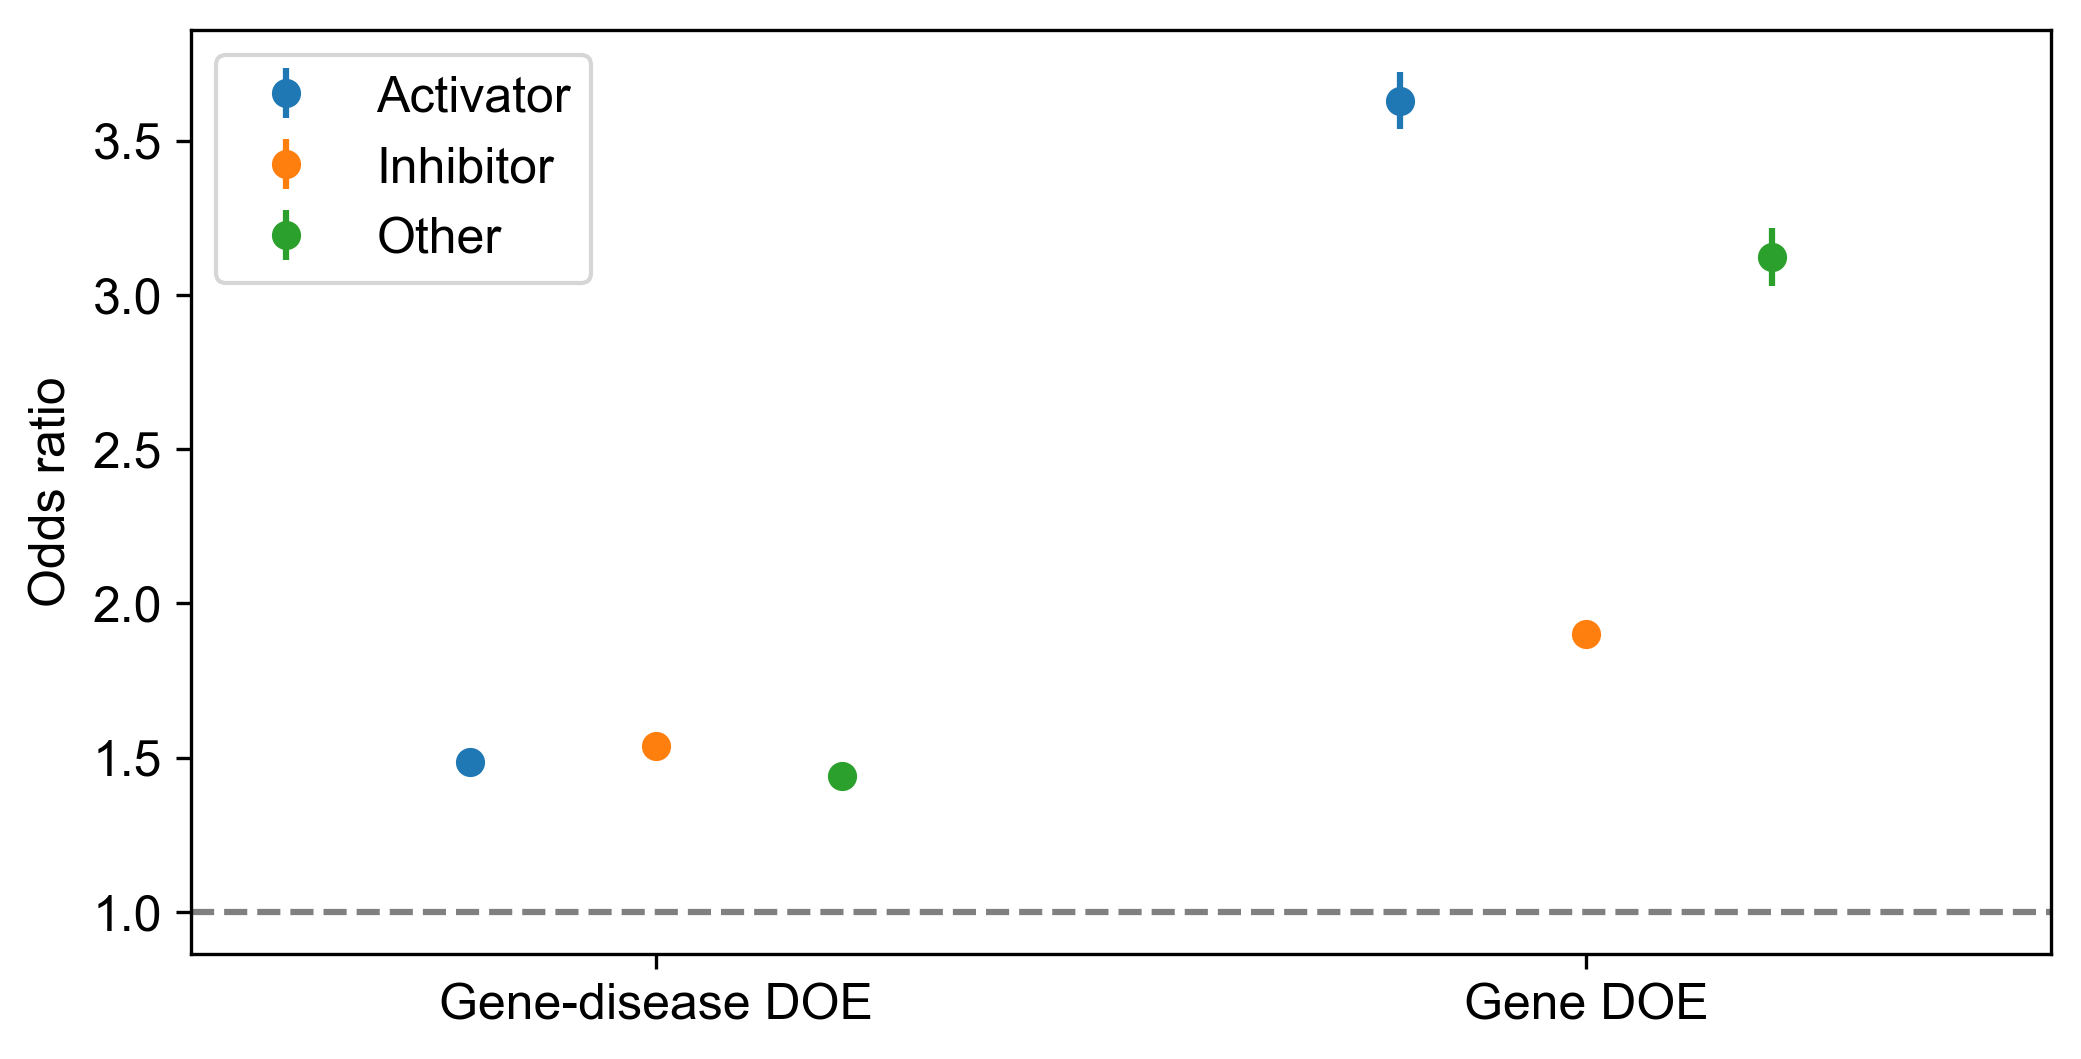

In [49]:
base_positions = {"Gene-disease DOE": 0, "Gene DOE": 1}
offsets = {"pos": -0.2, "neg": 0, "other": 0.2}
colors = {"pos": "C0", "neg": "C1", "other": "C2"}
outcome_to_label = {"neg": "Inhibitor", "other": "Other", "pos": "Activator"}

fig, ax = plt.subplots(figsize=(8, 4), dpi=300)
for outcome in ['pos', 'neg', 'other']:
    subset = rdf[rdf['Outcome'] == outcome]
    first = True
    for idx, row in subset.iterrows():
        base_x = base_positions[row['Variable']]
        x = base_x + offsets[outcome]
        y = row['OR']
        yerr = [[row['OR'] - row['CI_lower']], [row['CI_upper'] - row['OR']]]
        label = outcome_to_label[outcome] if first else None
        first = False
        ax.errorbar(x, y, yerr=yerr, fmt='o', color=colors[outcome], label=label)

ax.set_xticks(list(base_positions.values()))
ax.set_xticklabels(list(base_positions.keys()))
ax.set_ylabel("Odds ratio")
ax.axhline(y=1, linestyle='--', color='gray')
ax.set_xlim(min(base_positions.values()) - 0.5, max(base_positions.values()) + 0.5)

handles, labels = ax.get_legend_handles_labels()
unique = {}
for h, l in zip(handles, labels):
    if l not in unique:
        unique[l] = h
ax.legend(unique.values(), unique.keys())

plt.show()

### Above/below optimal cutoffs for F1 score

In [43]:
drugs = pd.read_pickle('./Drugs/combined.pkl').fillna(0)
for col in ['neg', 'other', 'pos']:
    drugs.loc[drugs[col] > 0, col] = 1
drugs['ID'] = drugs['Code'] + '|' + drugs['gene']
drugs = drugs.drop(['Code', 'gene'], axis=1)

# Load predictions and merge
data = pd.read_csv('./Training/Predictions/all_holdout_predictions.csv').merge(drugs)
data['gene'] = data['ID'].str.split('|').str[1]

doe = pd.read_csv('./Training/Predictions/doe_all_holdout_predictions.csv')
doe = doe.set_axis(['gene', 'doe_neg', 'doe_other', 'doe_pos'], axis=1)
data = data.merge(doe)

# Compute average predictions for each outcome
data['avg_neg']   = data[['pred_neg', 'doe_neg']].mean(axis=1)
data['avg_pos']   = data[['pred_pos', 'doe_pos']].mean(axis=1)
data['avg_other'] = data[['pred_other', 'doe_other']].mean(axis=1)


def run_logistic(baseline_mask, comp_mask, outcome, group_name):
    """
    Run logistic regression comparing a comparison group to the baseline.
    Returns a dict with odds ratio, 95% CI, and p-value, along with group counts.
    """
    # Subset data to only baseline and the comparison group
    subset = data[baseline_mask | comp_mask].copy()
    # Create binary indicator: 0 = baseline, 1 = comparison
    subset['group_indicator'] = 0
    subset.loc[comp_mask, 'group_indicator'] = 1
    
    # Prepare independent variable (with constant) and dependent outcome
    X = sm.add_constant(subset['group_indicator'])
    y = subset[outcome]
    
    # Fit logistic regression
    model = sm.Logit(y, X)
    result = model.fit(disp=0)
    
    coef = result.params['group_indicator']
    odds_ratio = np.exp(coef)
    conf = result.conf_int().loc['group_indicator']
    ci_lower = np.exp(conf[0])
    ci_upper = np.exp(conf[1])
    p_val = result.pvalues['group_indicator']
    
    # Calculate counts for the comparison group
    pos_count = data.loc[comp_mask, outcome].sum()
    total = comp_mask.sum()
    
    return {
        'Group': group_name,
        'Pos Count': pos_count,
        'Total': total,
        'Odds Ratio': odds_ratio,
        'CI Lower': ci_lower,
        'CI Upper': ci_upper,
        'p-value': p_val
    }

def run_group_analysis(outcome, pred_col, doe_col, pred_cutoff, doe_cutoff):
    """
    For a given outcome and its corresponding predictor and DOE columns, create the baseline group 
    (both predictors below cutoff) and three comparison groups:
      - Group 1: pred >= cutoff, doe < cutoff
      - Group 2: pred < cutoff, doe >= cutoff
      - Group 3: pred >= cutoff, doe >= cutoff
    Returns a pandas DataFrame summarizing counts and logistic regression results.
    """
    results = []
    
    # Create boolean masks for the baseline and comparison groups
    baseline_mask = (data[pred_col] < pred_cutoff) & (data[doe_col] < doe_cutoff)
    group1_mask   = (data[pred_col] >= pred_cutoff) & (data[doe_col] < doe_cutoff)
    group2_mask   = (data[pred_col] < pred_cutoff) & (data[doe_col] >= doe_cutoff)
    group3_mask   = (data[pred_col] >= pred_cutoff) & (data[doe_col] >= doe_cutoff)
    
    # Baseline counts (no logistic regression needed)
    baseline_pos = data.loc[baseline_mask, outcome].sum()
    baseline_total = baseline_mask.sum()
    results.append({
        'Group': f'Baseline ({pred_col} < {pred_cutoff}, {doe_col} < {doe_cutoff})',
        'Pos Count': baseline_pos,
        'Total': baseline_total,
        'Odds Ratio': np.nan,
        'CI Lower': np.nan,
        'CI Upper': np.nan,
        'p-value': np.nan
    })
    
    # Run logistic regression for each comparison group
    results.append(run_logistic(baseline_mask, group1_mask, outcome,
                                f'{pred_col} >= {pred_cutoff}, {doe_col} < {doe_cutoff}'))
    results.append(run_logistic(baseline_mask, group2_mask, outcome,
                                f'{pred_col} < {pred_cutoff}, {doe_col} >= {doe_cutoff}'))
    results.append(run_logistic(baseline_mask, group3_mask, outcome,
                                f'{pred_col} >= {pred_cutoff}, {doe_col} >= {doe_cutoff}'))
    
    return pd.DataFrame(results)

# Run the analysis for three outcomes
# For "pos": cutoffs are 0.22 for pred_pos and 0.24 for doe_pos
results_pos = run_group_analysis('pos', 'pred_pos', 'doe_pos', pred_cutoff=0.22, doe_cutoff=0.24)
results_pos['Outcome'] = 'pos'

# For "neg": cutoffs are 0.40 for pred_neg and 0.64 for doe_neg
results_neg = run_group_analysis('neg', 'pred_neg', 'doe_neg', pred_cutoff=0.40, doe_cutoff=0.64)
results_neg['Outcome'] = 'neg'

# For "other": cutoffs are 0.18 for pred_other and 0.37 for doe_other
results_other = run_group_analysis('other', 'pred_other', 'doe_other', pred_cutoff=0.18, doe_cutoff=0.37)
results_other['Outcome'] = 'other'

final_results = pd.concat([results_pos, results_neg, results_other], ignore_index=True)
final_results

,Group,Pos Count,Total,Odds Ratio,CI Lower,CI Upper,p-value,Outcome
0,"Baseline (pred_pos < 0.22, doe_pos < 0.24)",415.0,14432,NaN,NaN,NaN,NaN,pos
1,"pred_pos >= 0.22, doe_pos < 0.24",922.0,12515,2.686223,2.386182,3.023991,4.235086e-60,pos
2,"pred_pos < 0.22, doe_pos >= 0.24",2923.0,8076,19.159124,17.203638,21.336884,0.000000e+00,pos
3,"pred_pos >= 0.22, doe_pos >= 0.24",7010.0,12799,40.899825,36.873067,45.366329,0.000000e+00,pos
4,"Baseline (pred_neg < 0.4, doe_neg < 0.64)",10.0,136,NaN,NaN,NaN,NaN,neg
5,"pred_neg >= 0.4, doe_neg < 0.64",1353.0,4571,5.297638,2.773795,10.117895,4.411067e-07,neg
6,"pred_neg < 0.4, doe_neg >= 0.64",172.0,464,7.421918,3.794396,14.517428,4.751593e-09,neg
7,"pred_neg >= 0.4, doe_neg >= 0.64",30529.0,42651,31.732833,16.661283,60.437882,7.147349e-26,neg
8,"Baseline (pred_other < 0.18, doe_other < 0.37)",545.0,13518,NaN,NaN,NaN,NaN,other
9,"pred_other >= 0.18, doe_other < 0.37",559.0,7343,1.961417,1.736865,2.214999,1.795694e-27,other


0.0


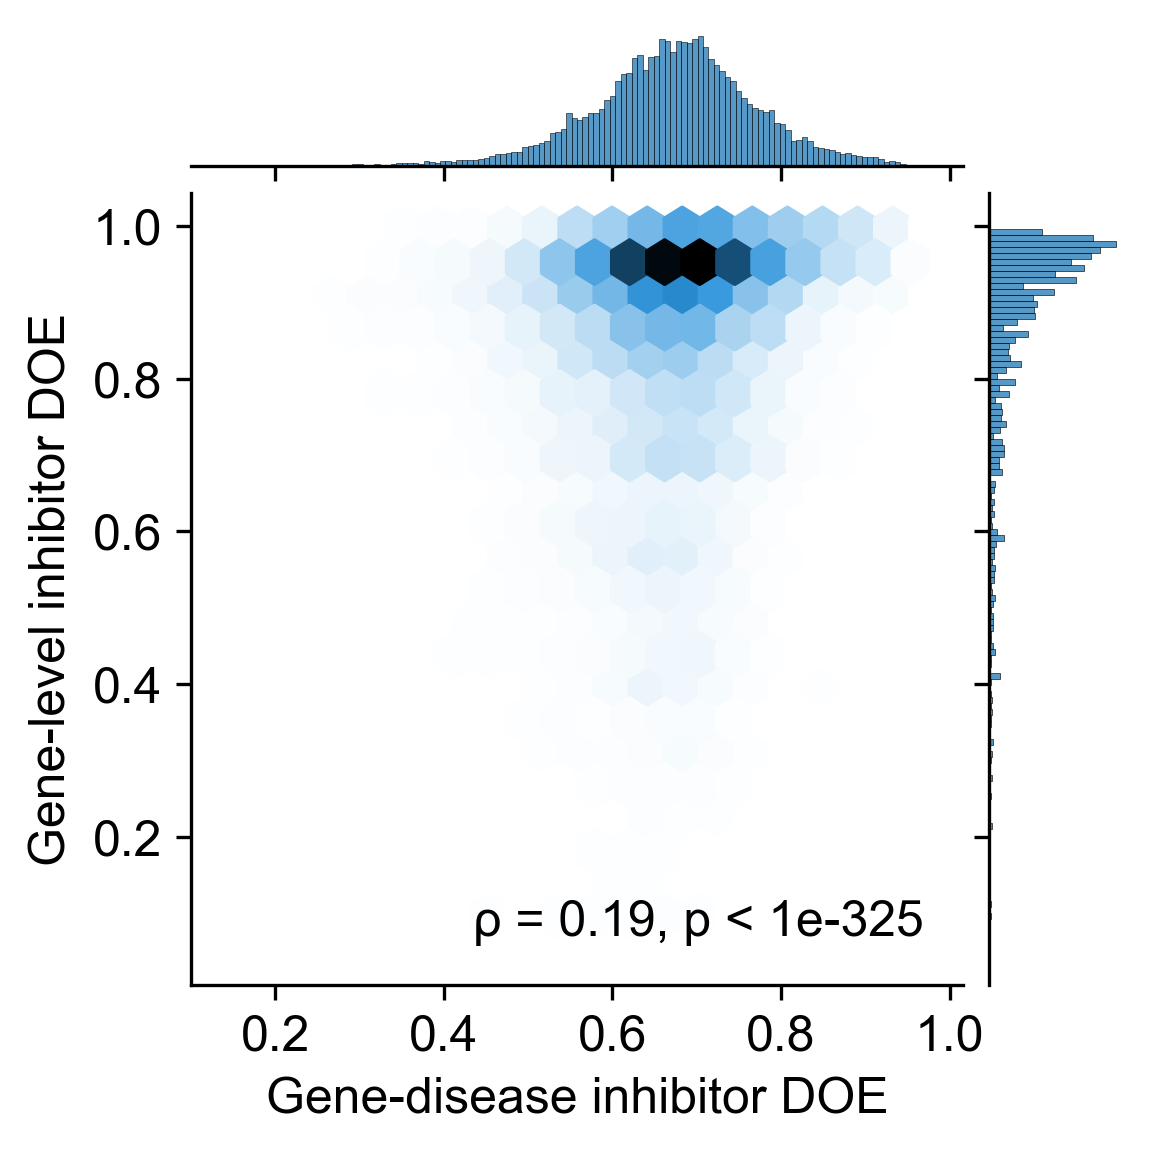

In [44]:
x = 'pred_neg'
y = 'doe_neg'
temp = data.dropna(subset=[x,y])

g = sns.jointplot(data=temp, x=x, y=y, kind="hex", joint_kws={'gridsize': 20}, height=4)
g.fig.set_dpi(300)

rho, p_value = spearmanr(temp[x], temp[y])
print(p_value)
annotation = f'ρ = {rho:.2f}, p < 1e-325'
g.ax_joint.text(0.95, 0.05, annotation, transform=g.ax_joint.transAxes,
                ha='right', va='bottom', fontsize=12)

plt.xlabel('Gene-disease inhibitor DOE')
plt.ylabel('Gene-level inhibitor DOE')
plt.show()


0.0


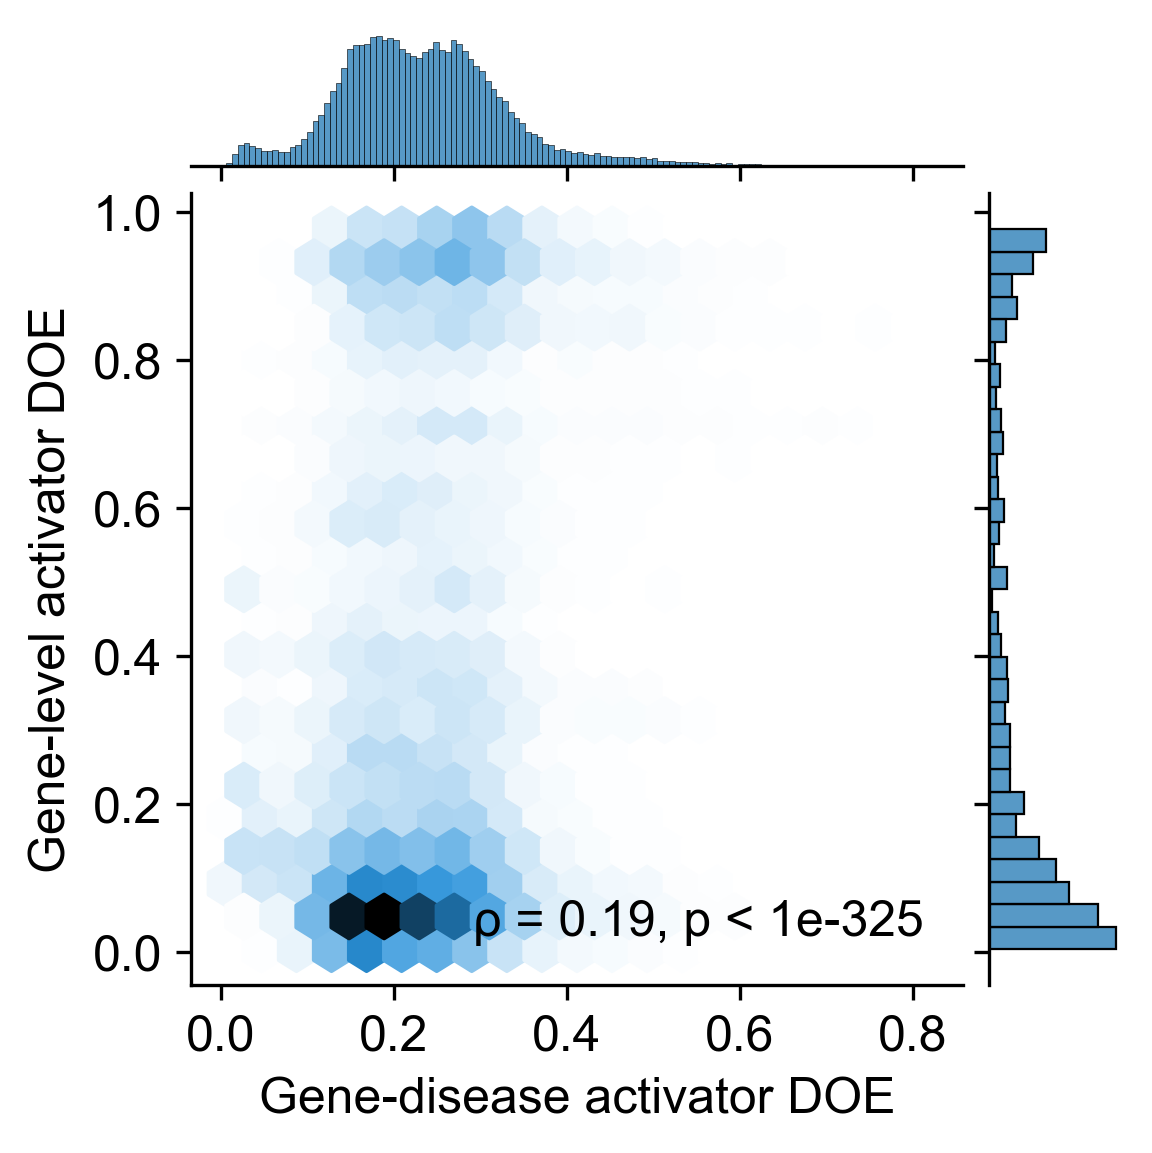

In [45]:
x = 'pred_pos'
y = 'doe_pos'
temp = data.dropna(subset=[x,y])

g = sns.jointplot(data=temp, x=x, y=y, kind="hex", joint_kws={'gridsize': 20}, height=4)
g.fig.set_dpi(300)

rho, p_value = spearmanr(temp[x], temp[y])
print(p_value)
annotation = f'ρ = {rho:.2f}, p < 1e-325'
g.ax_joint.text(0.95, 0.05, annotation, transform=g.ax_joint.transAxes,
                ha='right', va='bottom', fontsize=12)

plt.xlabel('Gene-disease activator DOE')
plt.ylabel('Gene-level activator DOE')
plt.show()


1.0276550718073913e-224


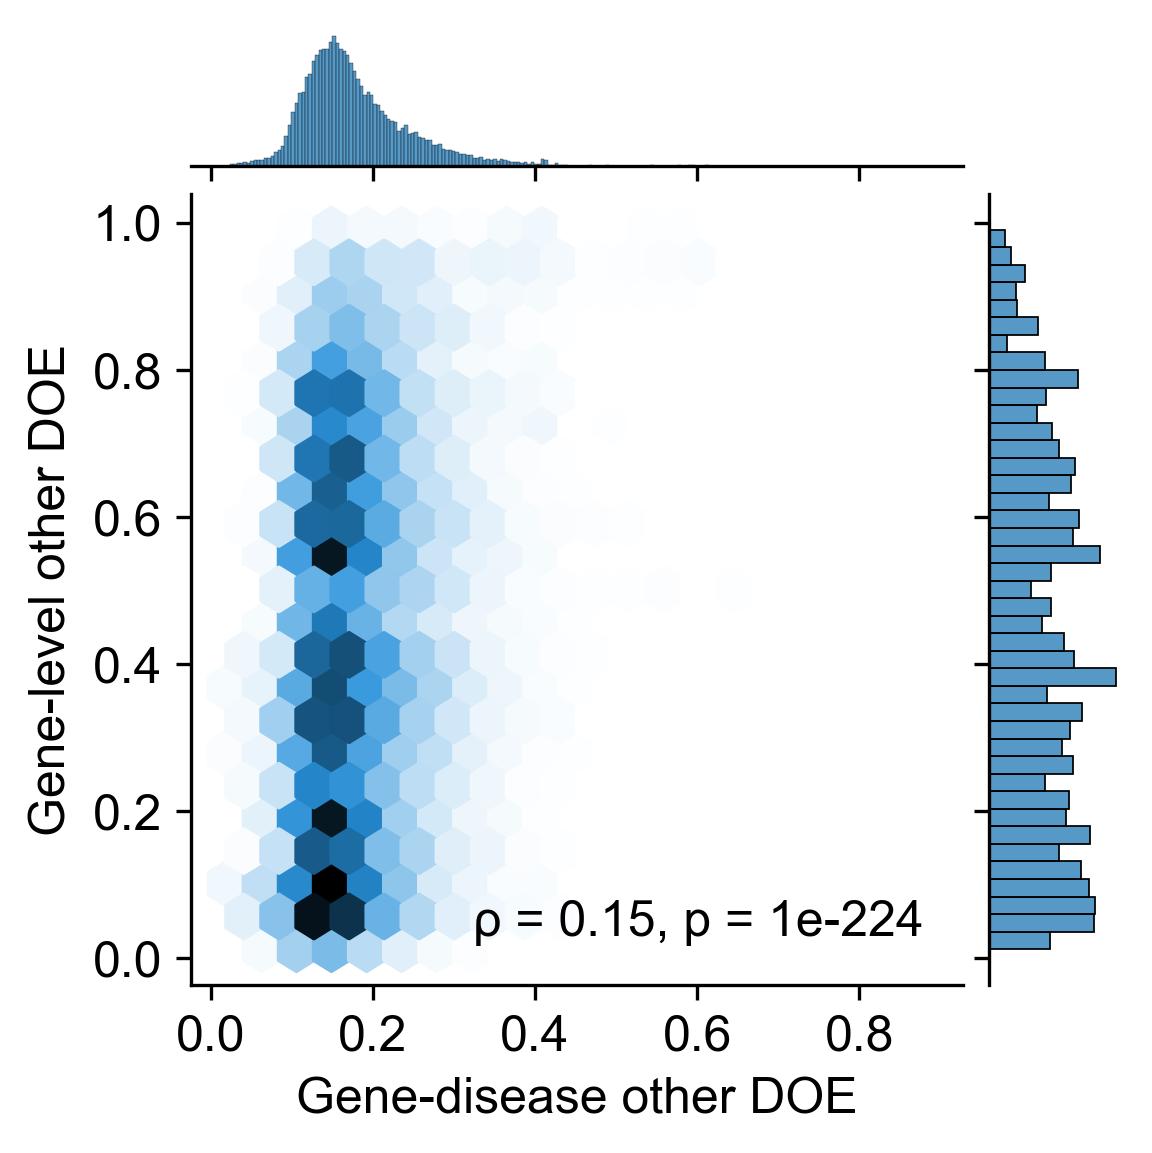

In [46]:
x = 'pred_other'
y = 'doe_other'
temp = data.dropna(subset=[x,y])

g = sns.jointplot(data=temp, x=x, y=y, kind="hex", joint_kws={'gridsize': 20}, height=4)
g.fig.set_dpi(300)

rho, p_value = spearmanr(temp[x], temp[y])
print(p_value)
annotation = f'ρ = {rho:.2f}, p = 1e-224'
g.ax_joint.text(0.95, 0.05, annotation, transform=g.ax_joint.transAxes,
                ha='right', va='bottom', fontsize=12)

plt.xlabel('Gene-disease other DOE')
plt.ylabel('Gene-level other DOE')
plt.show()
